# Project  -  WeRateDogs - Data Wrangling
### - By Prasad Nageshkar

## GATHER

In [276]:
%matplotlib inline

import pandas as pd
import numpy as np
import tweepy
import requests
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [277]:
# 1. Read the given enhanced twitter archive file
dftwit_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [278]:
# 2. Download image predictions file
URL ="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read image_predictions file    
dfimage_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [279]:
#3. Download data from twitter using tweepy

#Setup/authorization for accessing Twitter API
#consumer_key = 'CONS_KEY'
#consumer_secret = 'CONS_SECRET'
#access_token = 'ACC_TOKEN'
#access_secret = 'ACC_SECRET'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [280]:
#Store the tweet data fetched using twitter API in tweet_json.txt file

#with open('tweet_json.txt', 'w') as file:
#    t = time.process_time()
#    for tweet_id in dftwit_arch['tweet_id']:
#        try:
#            tweet_details = api.get_status(tweet_id,tweet_mode='extended')
#            json.dump(tweet_details._json, file)
#            file.write('\n')
#        except Exception as e:
#            print(tweet_id,e)
#    time_taken = time.process_time()-t
#    print(time_taken) # total time taken to fetch and write to file


In [281]:
#Reading JSON content from the tweet_json file in to dataframe - read only 3 columns
tweets_data = []
col_name = ('id','favorite_count', 'retweet_count')
with open('tweet_json.txt') as json_file:
    for line in json_file:
       try:
           tweet = json.loads(line)
           tweets_data.append(tweet)
       except:
           continue
dftweet_data = pd.DataFrame(tweets_data, columns =list(col_name))
dftweet_data.rename(columns={'id': 'tweet_id'}, inplace=True)

In [282]:
# dftweet_data contains the data read using twitter API
dftweet_data.sample(5)

,tweet_id,favorite_count,retweet_count
1192,716285507865542656,2957,1185
96,873213775632977920,7263,1607
756,777684233540206592,12212,3292
381,826240494070030336,14282,2878
1725,679722016581222400,1766,517


## ASSESS

### ASSESS Twitter Archive

In [283]:
dftwit_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1627,684594889858887680,nan,nan,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ALL THE SPOTS ARE GREY DAMN IT CINDY"" ...10/10 https://t.co/uhQNehTpIu",nan,nan,NaN,https://twitter.com/dog_rates/status/684594889858887680/photo/1,10,10,None,None,None,None,None
2286,667182792070062081,nan,nan,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,nan,nan,NaN,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,None,None,None,None
1612,685321586178670592,nan,nan,2016-01-08 04:46:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rocky. He sleeps like a psychopath. 10/10 quality tongue slip https://t.co/MbgG95mUdu,nan,nan,NaN,https://twitter.com/dog_rates/status/685321586178670592/photo/1,10,10,Rocky,None,None,None,None
1853,675706639471788032,nan,nan,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,nan,nan,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1591,686606069955735556,nan,nan,2016-01-11 17:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Horace. He was practicing his levitation, minding his own business when a rogue tennis ball spooked him. 10/10 https://t.co/tB9xYjMyZd",nan,nan,NaN,https://twitter.com/dog_rates/status/686606069955735556/photo/1,10,10,Horace,None,None,None,None
1104,735137028879360001,nan,nan,2016-05-24 15:55:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Buckley. His family &amp; some neighbors came over to watch him perform but he's nervous af. 9/10 u got this pupper https://t.co/5bdCpPlno9,nan,nan,NaN,https://twitter.com/dog_rates/status/735137028879360001/photo/1,9,10,Buckley,None,None,pupper,None
1170,720775346191278080,nan,nan,2016-04-15 00:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Berkeley. He's in a predicament. 10/10 someone help him https://t.co/XSEXdQupej,nan,nan,NaN,https://twitter.com/dog_rates/status/720775346191278080/photo/1,10,10,Berkeley,None,None,None,None
501,813096984823349248,nan,nan,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rocky. He got triple-doggo-dared. Stuck af. 11/10 someone help him https://t.co/soNL00XWVu,nan,nan,NaN,https://twitter.com/dog_rates/status/813096984823349248/photo/1,11,10,Rocky,doggo,None,None,None
1105,734912297295085568,nan,nan,2016-05-24 01:02:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jax. He's a literal fluffball. Sneaky tongue slip. 10/10 would pet nonstop https://t.co/9MGouPwQmK,nan,nan,NaN,https://twitter.com/dog_rates/status/734912297295085568/photo/1,10,10,Jax,None,None,None,None
1621,684926975086034944,nan,nan,2016-01-07 02:38:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Bruiser &amp; Charlie. They are the best of pals. Been through it all together. Both 11/10. 1 like=1 friendship https://t.co/PEXHuvSVD4,nan,nan,NaN,https://twitter.com/dog_rates/status/684926975086034944/photo/1,11,10,Bruiser,None,None,None,None


In [284]:
dftwit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [285]:
dftwit_arch.loc[dftwit_arch.tweet_id.duplicated()] # check if tweet Id is duplicated

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


######  check for data issues with dog names

In [286]:
dftwit_arch.name.value_counts() # 745 dogs don't have a name and 55 have "a" and 15 have "the" and "an" as their name

None            745
a               55 
Charlie         12 
Oliver          11 
Cooper          11 
Lucy            11 
Lola            10 
Tucker          10 
Penny           10 
Bo              9  
Winston         9  
Sadie           8  
the             8  
Bailey          7  
Toby            7  
Daisy           7  
Buddy           7  
an              7  
Milo            6  
Koda            6  
Jack            6  
Jax             6  
Dave            6  
Scout           6  
Leo             6  
Stanley         6  
Rusty           6  
Bella           6  
Oscar           6  
Chester         5  
               ..  
Enchilada       1  
Miguel          1  
Link            1  
Clyde           1  
Chevy           1  
Jazzy           1  
Aqua            1  
Harvey          1  
Ben             1  
unacceptable    1  
Luther          1  
Miley           1  
Jebberson       1  
Bruno           1  
Darrel          1  
Fwed            1  
Kawhi           1  
Mairi           1  
Remy            1  


##### Check for data issues related to Dog ratings - Denominator should be 10 and Numerator should typically be between 10 and 20

In [287]:
# dftwit_arch.loc[dftwit_arch.rating_denominator < 10] # 3 entries
# dftwit_arch.loc[dftwit_arch.rating_numerator < 10] # 440 entries
dftwit_arch.loc[dftwit_arch.rating_numerator > 20] # 24 entries

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,"855,861,584,463,351,808.00","194,351,775.00",2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,nan,nan,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,"855,858,535,607,001,088.00","13,615,722.00",2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",nan,nan,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,"838,145,498,691,194,880.00","21,955,058.00",2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,nan,nan,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,"835,245,984,028,504,064.00","26,259,576.00",2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",nan,nan,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,nan,nan,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…","786,709,082,849,828,864.00","4,196,983,835.00",2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,nan,nan,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,nan,nan,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,nan,nan,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,nan,nan,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,nan,nan,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",nan,nan,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,nan,nan,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,nan,nan,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,nan,nan,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,nan,nan,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1

##### Check for data issues related to dog stage

In [288]:
# How many rows have 'None' entries  for the dog stage
len(dftwit_arch[(dftwit_arch.doggo == 'None') & (dftwit_arch.floofer == 'None') & 
            (dftwit_arch.pupper == 'None') & (dftwit_arch.puppo == 'None')])

1976

In [289]:
# How many rows have more than 1 dog stage entry
len(dftwit_arch[(dftwit_arch.doggo != 'None') & ((dftwit_arch.floofer != 'None') | 
                                             (dftwit_arch.pupper != 'None') | (dftwit_arch.puppo != 'None'))])

14

##### Check for data issues related to presence of url for dog pictures

In [290]:
# How many blank entries in URL
len(dftwit_arch[dftwit_arch.expanded_urls.isnull()])

59

In [291]:
# How many duplicate URL's
len(dftwit_arch[dftwit_arch.expanded_urls.duplicated()])

137

In [292]:
# How many rows are Retweets
len(dftwit_arch[dftwit_arch.retweeted_status_id.notnull()])

181

### ASSESS  Tweet Data downloaded using Twitter API

In [293]:
dftweet_data.sample(5)

,tweet_id,favorite_count,retweet_count
213,850333567704068097,3583,357
1363,701952816642965504,4073,1111
1665,682088079302213632,19609,10895
1745,678767140346941444,3757,1497
1248,710272297844797440,4820,1376


In [294]:
dftweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [295]:
# check if any tweet_id is duplicate
dftweet_data[dftweet_data.tweet_id.duplicated()] 

,tweet_id,favorite_count,retweet_count


In [296]:
# find out how many of the tweet_ids from dftwit_arch exists in dftweet_data
tweet_ids = set(dftwit_arch.tweet_id) # Get the unique list of tweetIds (# 2356) from  dftwit_arch dataframe
len(dftweet_data[dftweet_data.tweet_id.isin(tweet_ids)]) 

2345

In [297]:
# 11 tweet_ids in dftwit_arch_clean dataframe do not exist in dftweet_data

In [298]:
dftweet_data.loc[dftweet_data.tweet_id.duplicated()] # check if all tweet ids are unique

,tweet_id,favorite_count,retweet_count


### ASSESS Image Prediction Data

In [299]:
dfimage_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1964,867072653475098625,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.35,True,papillon,0.21,True,Pekinese,0.11,True
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.72,True,Chesapeake_Bay_retriever,0.12,True,Newfoundland,0.04,True
762,688898160958271489,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,1,Ibizan_hound,0.85,True,Chihuahua,0.04,True,Italian_greyhound,0.04,True
127,668268907921326080,https://pbs.twimg.com/media/CUYrBNQUkAA-zx4.jpg,1,Pembroke,0.48,True,Cardigan,0.43,True,basenji,0.01,True
877,698342080612007937,https://pbs.twimg.com/ext_tw_video_thumb/698341973569245184/pu/img/Sj3A2vSfbKWSv61T.jpg,1,boxer,0.88,True,Saint_Bernard,0.03,True,Staffordshire_bullterrier,0.01,True


In [300]:
dfimage_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [301]:
# Check if all tweet_ids are unique
dfimage_pred[dfimage_pred['tweet_id'].duplicated()] 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [302]:
# find out how many picture Url's have duplicates
dfdupimage = dfimage_pred[dfimage_pred.jpg_url.duplicated()]
len(dfimage_pred[dfimage_pred.jpg_url.duplicated()])

66

In [303]:
# Check if these tweet_ids correspond to retweets
dftwit_arch[dftwit_arch.tweet_id.isin(dfdupimage.tweet_id)] 
# On visual inspection: All 66 are  retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,nan,nan,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,"887,473,957,103,951,872.00","4,196,983,835.00",2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
36,885311592912609280,nan,nan,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,"830,583,320,585,068,544.00","4,196,983,835.00",2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
95,873697596434513921,nan,nan,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,"868,880,397,819,494,400.00","4,196,983,835.00",2017-05-28 17:23:24 +0000,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",14,10,Walter,None,None,None,None
155,861769973181624320,nan,nan,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9","806,629,075,125,202,944.00","4,196,983,835.00",2016-12-07 22:38:52 +0000,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",13,10,None,None,None,None,None
211,851953902622658560,nan,nan,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,"829,374,341,691,346,944.00","4,196,983,835.00",2017-02-08 17:00:26 +0000,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13,10,Astrid,doggo,None,None,None
260,842892208864923648,nan,nan,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,"807,106,840,509,214,720.00","4,196,983,835.00",2016-12-09 06:17:20 +0000,"https://twitter.com/dog_rates/status/807106840509214720/video/1,https://twitter.com/dog_rates/status/807106840509214720/video/1",13,10,Stephan,None,None,None,None
266,841833993020538882,nan,nan,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ke

In [304]:
# Check if we can reduce the prediction of the dog breed to just 1 instead of 3

In [305]:
# List rows that have all 3 predictions as dog
len(dfimage_pred[(dfimage_pred.p1_dog == True) & (dfimage_pred.p2_dog == True) &
                   (dfimage_pred.p3_dog == True)])


1243

In [306]:
# rows that have atleast 1 dog prediction
len(dfimage_pred[(dfimage_pred.p1_dog == True) | (dfimage_pred.p2_dog == True) |
                   (dfimage_pred.p3_dog == True)])

1751

In [307]:
# List rows that do have No prediction for a dog
len(dfimage_pred [(dfimage_pred.p1_dog == False) & (dfimage_pred.p2_dog == False) &
                   (dfimage_pred.p3_dog == False)])


324

In [308]:
# check if magnitude of confidence-levels is in the following order p1_conf > p2_conf > p3_conf

In [309]:
dfimage_pred[(dfimage_pred.p1_dog == True) & (dfimage_pred.p2_dog == True) &
                   (dfimage_pred.p3_dog == False) & (dfimage_pred.p2_conf > dfimage_pred.p1_conf)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [310]:
dfimage_pred[(dfimage_pred.p1_dog == True) & (dfimage_pred.p2_dog == False) &
                   (dfimage_pred.p3_dog == True) & (dfimage_pred.p3_conf > dfimage_pred.p1_conf)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [311]:
dfimage_pred[(dfimage_pred.p1_dog == False) & (dfimage_pred.p2_dog == True) &
                   (dfimage_pred.p3_dog == True) & (dfimage_pred.p3_conf > dfimage_pred.p2_conf)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### QUALITY

##### dftwit_arch -  Data Read from Twitter archive
- Retweets are not needed since the images /ratings are repeated - 181 retweets
- Float Data type for Columns : in_reply_to_status_id,in_reply_to_user_id
- String Data type for timestamp and retweeted_status_timestamp
- The 'rating_numerator' column has few values unusually low or above 10
- The 'rating_denominator' column has a few values above 10 and a couple of them below 10
- 1976 rows do not have any value for  dog stages (doggo, floofer, pupper and puppo)
- 14 rows have more than one entry for dog stages instead of 1 - e.g : doggo and puppo or doggo and pupper)
- The expanded_urls column has 59 blank values - so no pictures of dog 

- OTHER ISSUES : (Not under scope of this project)
- name column has 745 values that have None as entries (Probably Null) and a few other names (83 values) that have not been stripped out properly - example names listed  = 'a', 'an', 'the','quite','one','unacceptable'


##### dftweet_data -  Relevant Tweet_data pulled through twitter API
- The data has only 2345 tweet Ids compared to 2356 tweet Ids in "twitter archive"
- Some of The values in column id and id_str do not match

- OTHER ISSUES in the original data from twitter API: (Not under scope of this project)
- Some columns like contributor, coordinates, geo do not have any values
- Data type for the Column 'language' could be Categorical

- (Note: For our Analysis - only columns id, favorite_count and retweet_count will be used )


##### dfimage_pred - Data read from Image Prediction File
-  This data has only 2075 tweet ids compared to 2345 in dftweet_data and 2356 in dftwit_arch
-  66 jpg image URLs are duplicated


### TIDINESS

- In "twitter archive" Multiple Columns for Dog Stages (doggo, floofer, pupper and puppo) are not required - can use only 1 column 
- Dataframes - dftwitt_arch and dftweet_data  should be combined to form one single dataframe.
- In dfimage_pred - reduce the set of columns for 3 predictions to 1 - Have just a single prediction  would be a dog or nodog 


## CLEAN

In [312]:
#Get a copy to work upon
dftwit_arch_clean = dftwit_arch.copy()
dftweet_data_clean = dftweet_data.copy()
dfimage_pred_clean = dfimage_pred.copy()

##### Q1.Retweets are not needed since the images /ratings are repeated

##### Define
- In Twitter Archive :Remove all rows that are Retweets (# 181) and drop the columns related to retweet

In [313]:
dftwit_arch_clean.shape

(2356, 17)

#### Code

In [314]:
# Remove all rows with retweets
dftwit_arch_clean = dftwit_arch_clean[dftwit_arch_clean.retweeted_status_id.isnull()] 

In [315]:
# remove retweet related columns
dftwit_arch_clean = dftwit_arch_clean.drop(['retweeted_status_id','retweeted_status_user_id',
                                            'retweeted_status_timestamp'],axis=1)

#### Test

In [316]:
dftwit_arch_clean.shape

(2175, 14)

In [317]:
dftwit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Q2.String Data type for timestamp and retweeted_status_timestamp

##### Define
- Convert timestamp and retweeted_status_timestamp to data type datetime.

#### Code

In [318]:
# retweeted_status_timestamp has already been dropped above - so just change for timestamp column
dftwit_arch_clean.timestamp = pd.to_datetime(dftwit_arch_clean.timestamp) 

#### Test

In [319]:
dftwit_arch_clean.dtypes # check datatype of timestamp 

tweet_id                 int64         
in_reply_to_status_id    float64       
in_reply_to_user_id      float64       
timestamp                datetime64[ns]
source                   object        
text                     object        
expanded_urls            object        
rating_numerator         int64         
rating_denominator       int64         
name                     object        
doggo                    object        
floofer                  object        
pupper                   object        
puppo                    object        
dtype: object

In [320]:
#dftweet_data_clean.shape

#### Q3. Float Data type for Columns : in_reply_to_status_id,in_reply_to_user_id

#### Define
- Remove the columns in_reply_to_status_id,in_reply_to_user_id since these are not going to be useful for our analysis

#### Code

In [321]:
dftwit_arch_clean = dftwit_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

#### Test

In [322]:
dftwit_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### T1. Dataframes - dftwitt_arch and dftweet_data  should be combined to form one single dataframe
#### Q4. The dftweet_data has only 2345 tweeter ID's compared to 2356 tweeter ID's in "twitter archive"

#### Define
- Merge dftwitt_arch_clean and dftweet_data_clean (inner join) on tweet_id : will return only rows with common tweet_ids 

#### Code

In [323]:
dftwit_master = pd.merge(dftwit_arch_clean,dftweet_data_clean, on = 'tweet_id',how = 'inner')
# This will ensure that all the data for common tweet_ids gets merged in to a single dataframe dftwit_master

#### Test

In [324]:
dftwit_master.info() # Now on we will use dftwit_master as a source for all tweet data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
favorite_count        2175 non-null int64
retweet_count         2175 non-null int64
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 254.9+ KB


#### Q5.The dfimage_pred data has only 2075 tweet ids compared to 2345 in dftweet_data and 2356 in dftwit_arch

#### Define
- Ensure that dfimage_pred_clean dataframes has images related to only tweet_ids present in df_twit_master.
- Remove rows from dfimage_pred_clean dataframe that have tweet_ids not present in dftwit_master

#### Code

In [325]:
dfimage_pred_clean.shape

(2075, 12)

In [326]:
# retain only those rows in dfimage_pred_clean that have a corresponding matching tweet_id in dftwit_master
dfimage_pred_clean = dfimage_pred_clean [dfimage_pred_clean.tweet_id.isin(dftwit_master.tweet_id)]

#### Test

In [327]:
# check if dfimage_pred_clean has any tweet_id that is not present in dftwit_master
dfimage_pred_clean[~dfimage_pred_clean.tweet_id.isin(dftwit_master.tweet_id)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [328]:
dfimage_pred_clean.shape

(1994, 12)

In [329]:
# dftwit_master has 2175 tweet_id, out of which only  1994 exist in dfimage_pred_clean

#### Q6. 66 jpg image URLs are duplicated (all retweet)

#### Define
- Remove rows from dfimage_pred that have duplicate URLs

#### Code

In [330]:
# check if the rows with duplicate URL's still exist or have been removed due to earlier removals
dfimage_pred_clean[dfimage_pred_clean.jpg_url.duplicated()] 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Test

In [331]:
# The code above indicates that there are no duplicate jpg urls

#### Q7. rating_numerator column has few values unusually low or above 10
#### Q8. rating_denominator column has a few values above 10 and a couple of them below 10

#### Define
- If possible Correct the entries or Remove rows from dftwit_master if rating_numerator entries are invalid

#### Code

In [332]:
pd.set_option('display.max_colwidth', -1)

In [333]:
#Visual inspection - Fix cells that have the right rating value in text columns but represented incorrectly in the rating columns
dftwit_master.loc[(dftwit_master.rating_numerator < 8) & (dftwit_master.rating_denominator != 10)] 


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
987,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,4376,1711
1419,686035780142297088,2016-01-10 04:04:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,4,20,None,None,None,None,None,1238,133
1483,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None,39611,18349
2154,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None,148,67


In [334]:
# Update following numerator and denominator ratings based on text column
dftwit_master.loc[dftwit_master.tweet_id == 722974582966214656, 'rating_denominator'] = 10
dftwit_master.loc[dftwit_master.tweet_id == 722974582966214656, 'rating_numerator'] = 13
dftwit_master.loc[dftwit_master.tweet_id == 682962037429899265, 'rating_denominator'] = 10
dftwit_master.loc[dftwit_master.tweet_id == 682962037429899265, 'rating_numerator'] = 10
dftwit_master.loc[dftwit_master.tweet_id == 666287406224695296, 'rating_denominator'] = 10
dftwit_master.loc[dftwit_master.tweet_id == 666287406224695296, 'rating_numerator'] = 9

In [335]:
dftwit_master = dftwit_master[dftwit_master.tweet_id != 686035780142297088] # Drop this as there is no rating

In [336]:
# check - if the issue fixed
dftwit_master.loc[(dftwit_master.rating_numerator < 8) & (dftwit_master.rating_denominator != 10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count


In [337]:
 # inspect rows with ratings < 8
dftwit_master.loc[dftwit_master.rating_numerator < 8]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
42,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,45887,10024
197,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None,17201,3333
265,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None,24018,3332
326,826598799820865537,2017-02-01 01:11:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,7,10,None,None,None,None,None,5515,283
590,781661882474196992,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None,11376,3041
618,777885040357281792,2016-09-19 15:00:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None,6906,1837
659,771014301343748096,2016-08-31 15:58:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,https://twitter.com/dog_rates/status/771014301343748096/photo/1,7,10,None,None,None,None,None,7451,1841
717,760252756032651264,2016-08-01 23:15:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None,4253,956
727,759099523532779520,2016-07-29 18:53:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi,https://twitter.com/dog_rates/status/759099523532779520/photo/1,7,10,Toby,None,None,None,None,15688,4646
741,757596066325864448,2016-07-25 15:19:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,

In [338]:
# Drop the above rows -  visual inspection reveals that these are either not dogs or do not have proper picture for rating
dftwit_master = dftwit_master[dftwit_master.rating_numerator >= 8]

In [339]:
dftwit_master.shape

(2001, 14)

In [340]:
# Get rows that have a rating_denominator other than 10
dftwit_master.loc[dftwit_master.rating_denominator != 10]
# 835246439529840640 - change rating to 13/10
# 740373189193256964 - change rating to 14/10
# drop - Not rated :832088576586297345, 810984652412424192 , 682808988178739200
# remaining high denominator ratings are multiples of 10 - directly proportional to number of dogs- applies to Numerator too

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
263,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None,2229,80
287,832088576586297345,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None,72,2
363,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,13213,3601
429,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,5815,1606
733,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,5179,2465
890,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None,37070,14583
942,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None,4085,1387
1024,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,2511,238
1050,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None,3003,810
1075,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None,2457,615


In [341]:
dftwit_master = dftwit_master[dftwit_master.tweet_id != 832088576586297345] # Drop this as there is no rating
dftwit_master = dftwit_master[dftwit_master.tweet_id != 810984652412424192] # Drop this as there is no rating
dftwit_master = dftwit_master[dftwit_master.tweet_id != 682808988178739200] # Drop this as there is no rating

In [342]:
dftwit_master.loc[dftwit_master.tweet_id == 835246439529840640, 'rating_denominator'] = 10
dftwit_master.loc[dftwit_master.tweet_id == 835246439529840640, 'rating_numerator'] = 13
dftwit_master.loc[dftwit_master.tweet_id == 740373189193256964, 'rating_denominator'] = 10
dftwit_master.loc[dftwit_master.tweet_id == 740373189193256964, 'rating_numerator'] = 14

In [343]:
# Now All denominators (and numerators) greater than 10 need to be normalized - cause multiple dogs exist and we need to average
# Example - Rating of 143/130 implies there were 13 dogs...so ideally it should be  143/13 / 130/13 = 11/10 or 121/110 = 11/10

In [344]:
num_rat = []
denom_rat = []

def normalize_rating(df):
    if df['rating_denominator'] > 10:
        mul = df['rating_denominator']/10
        denom_rat.append(df['rating_denominator'] / mul)
        num_rat.append(df['rating_numerator'] / mul)
    else:
        denom_rat.append(df['rating_denominator'])
        num_rat.append(df['rating_numerator'])

dftwit_master.apply(normalize_rating, axis = 1)

dftwit_master['numerator_rating'] = num_rat
dftwit_master['denominator_rating'] = denom_rat

dftwit_master = dftwit_master.drop(['rating_denominator', 'rating_numerator'], axis = 1)


In [345]:
# Very High Numerator ratings 
dftwit_master[dftwit_master.numerator_rating > 20]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating
162,855862651834028034,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,None,None,None,None,None,359,28,420.00,10.00
163,855860136149123072,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,None,None,None,None,None,5148,1095,666.00,10.00
246,838150277551247360,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,None,None,None,None,None,1789,357,182.00,10.00
558,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Logan,None,None,None,None,19844,6834,75.00,10.00
617,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,Sophie,None,None,pupper,None,7133,1818,27.00,10.00
804,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,None,None,None,None,5499,2704,"1,776.00",10.00
1533,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,None,None,None,None,None,1829,528,26.00,10.00
1895,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,None,None,None,None,None,25456,9264,420.00,10.00


In [346]:
#  Manually update the ones with decimal point ratings
# delete the others with high ratings - these don't make sense or don't have pictures to refer

dftwit_master.loc[dftwit_master.tweet_id == 680494726643068929, 'numerator_rating'] = 11.26
dftwit_master.loc[dftwit_master.tweet_id == 778027034220126208, 'numerator_rating'] = 11.27
dftwit_master.loc[dftwit_master.tweet_id == 786709082849828864, 'numerator_rating'] = 9.75

dftwit_master = dftwit_master[dftwit_master.tweet_id != 749981277374128128] # Drop this as rating is way too high
dftwit_master = dftwit_master[dftwit_master.tweet_id != 838150277551247360] # Drop this as rating is way too high
dftwit_master = dftwit_master[dftwit_master.tweet_id != 855862651834028034] # Drop this as way too high
dftwit_master = dftwit_master[dftwit_master.tweet_id != 855860136149123072] # Drop this as rating is way too high
dftwit_master = dftwit_master[dftwit_master.tweet_id != 670842764863651840] # Drop this as rating is way too high

#### Test

In [347]:
dftwit_master.shape

(1993, 14)

In [348]:
dftwit_master[dftwit_master.numerator_rating > 20]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating


In [349]:
dftwit_master[dftwit_master.numerator_rating < 8]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating


In [350]:
dftwit_master[dftwit_master.denominator_rating != 10]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating


#### Q9. 14 rows have more than one entry for Dog Stages instead of 1 - e.g : doggo and puppo or doggo and pupper)
#### Q10. 1976 rows do not have any value for Dog Stages (doggo, floofer, pupper and puppo)

#### Define
- Ensure that there is only 1 entry for the Dog stage or remove the row
- If there is an easy way to determine the dog_stage of rows marked where all are listed as None,do it or let it be as it is

#### Code

In [351]:
# List rows that have entry for doggo and any of the remaining 3 stages
dftwit_master[(dftwit_master.doggo != 'None') & ((dftwit_master.floofer != 'None') | 
                                                 (dftwit_master.pupper != 'None') | (dftwit_master.puppo != 'None'))]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating
165,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,None,doggo,None,None,puppo,46881,18666,13.00,10.00
172,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",None,doggo,floofer,None,None,16799,3345,11.00,10.00
382,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,Dido,doggo,None,pupper,None,11601,2980,13.00,10.00
442,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,None,doggo,None,pupper,None,9494,2452,12.00,10.00
467,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,None,doggo,None,pupper,None,6909,1525,11.00,10.00
474,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",Bones,doggo,None,pupper,None,8806,2351,12.00,10.00
567,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",Pinot,doggo,None,pupper,None,8523,2486,10.00,10.00
593,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,None,doggo,None,pupper,None,7771,2859,12.00,10.00
722,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",Maggie,doggo,None,pupper,None,6443,2117,12.00,10.00
885,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and 

In [352]:
# Update tweet_ids = 855851453814013952 -> make doggo = None
# Update tweet_ids = 854010172552949760 -> make doggo = None
# Update tweet_ids = 817777686764523521 -> make doggo = None
# for the remaining ones for ease,just maintain only doggo - most of these have 2 dogs(one small and one big) hence 2 entries

dftwit_master.loc[dftwit_master.tweet_id == 855851453814013952, 'doggo'] = 'None'
dftwit_master.loc[dftwit_master.tweet_id == 854010172552949760, 'doggo'] = 'None'
dftwit_master.loc[dftwit_master.tweet_id == 817777686764523521, 'doggo'] = 'None'

In [353]:
# remaining columns has only doggo hence set other dog stage columns to None
twit_ids= dftwit_master[(dftwit_master.doggo != 'None') & ((dftwit_master.floofer != 'None') | 
                                                 (dftwit_master.pupper != 'None') | (dftwit_master.puppo != 'None'))].tweet_id
dftwit_master.loc[dftwit_master.tweet_id.isin(twit_ids), ['floofer','pupper','puppo']] = 'None'

#### Test

In [354]:
dftwit_master[(dftwit_master.doggo != 'None') & ((dftwit_master.floofer != 'None') | 
                                                 (dftwit_master.pupper != 'None') | (dftwit_master.puppo != 'None'))]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating


In [355]:
dftwit_master[(dftwit_master.puppo != 'None') & ((dftwit_master.floofer != 'None') | 
                                                 (dftwit_master.pupper != 'None') | (dftwit_master.doggo != 'None'))]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating


In [356]:
dftwit_master[(dftwit_master.pupper != 'None') & ((dftwit_master.floofer != 'None') | 
                                                 (dftwit_master.puppo != 'None') | (dftwit_master.doggo != 'None'))]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating


In [357]:
dftwit_master[(dftwit_master.floofer != 'None') & ((dftwit_master.pupper != 'None') | 
                                                 (dftwit_master.puppo != 'None') | (dftwit_master.doggo != 'None'))]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating


#### Code
- For all rows that have 'None' entries in all four dog stage columns - Update dog stages where possible

In [358]:

dftwit_master[(dftwit_master.doggo == 'None') & ((dftwit_master.floofer == 'None') & 
                                                 (dftwit_master.pupper == 'None') & (dftwit_master.puppo == 'None'))]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,numerator_rating,denominator_rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,38718,8566,13.00,10.00
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,33174,6299,13.00,10.00
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,24985,4180,12.00,10.00
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,42115,8690,13.00,10.00
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,40258,9456,12.00,10.00
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,None,None,None,None,20190,3130,13.00,10.00
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,None,None,None,None,11829,2086,13.00,10.00
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,None,None,None,None,65407,19005,13.00,10.00
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,None,None,None,None,27741,4286,13.00,10.00
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshar

In [359]:
# List all such rows and their tweet_ids
twit_ids= dftwit_master[(dftwit_master.doggo == 'None') & ((dftwit_master.floofer == 'None') & 
                                                 (dftwit_master.pupper == 'None') & (dftwit_master.puppo == 'None'))].tweet_id
len(twit_ids)

1661

In [360]:
# Change puppo column entry to "puppo" if the text column contains string "puppo"
dftwit_master.loc[dftwit_master.tweet_id.isin(twit_ids) & dftwit_master.text.str.contains('puppo'), 'puppo'] = 'puppo'

In [361]:
# check for reduction
len(dftwit_master[(dftwit_master.doggo == 'None') & ((dftwit_master.floofer == 'None') & 
                                                 (dftwit_master.pupper == 'None') & (dftwit_master.puppo == 'None'))])

1654

In [362]:
# change doggo column entry to "doggo" if the text column contains string "doggo"
dftwit_master.loc[dftwit_master.tweet_id.isin(twit_ids) & dftwit_master.text.str.contains('doggo'), 'doggo'] = 'doggo'

In [363]:
# Change puppo column entry to "pupper" if the text column contains string "pupper"
dftwit_master.loc[dftwit_master.tweet_id.isin(twit_ids) & dftwit_master.text.str.contains('pupper'), 'pupper'] = 'pupper'

#### Test

In [364]:
# Check if numbers of rows have reduced
len(dftwit_master[(dftwit_master.doggo == 'None') & ((dftwit_master.floofer == 'None') & 
                                                 (dftwit_master.pupper == 'None') & (dftwit_master.puppo == 'None'))])

1625

#### T2. In "twitter archive" Multiple Columns for Dog Stages (doggo, floofer, pupper and puppo) are not required - can use only 1 column

#### Define
- Melt the multiple dog stage columns in to a single column

#### Code

In [365]:

# List the columns from dftwit_master to melt and the ones that are unchanged
melt_col_list = ['doggo', 'floofer', 'pupper', 'puppo']
fix_col_list = [col for col in dftwit_master.columns.tolist() if col not in melt_col_list]

# Melt the the columns into rows (Re-shape from horizontal to vertical stacking)
dftwit_master = pd.melt(dftwit_master, id_vars = fix_col_list, value_vars = melt_col_list, 
                        var_name = 'stage_col', value_name = 'dog_stage')

# Delete column 'stage_col' since dog_stage will have all the dog_stage values and None if there is no value
dftwit_master = dftwit_master.drop('stage_col', 1) 

print(dftwit_master.dog_stage.value_counts()) # increase in rows due to reshaping - has 4 entries of each tweet_ids



None       7604
pupper     235 
doggo      91  
puppo      32  
floofer    10  
Name: dog_stage, dtype: int64


In [366]:
# Filter for unique values then remove duplicate values based on 'dog_stage' values
dftwit_master = dftwit_master.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#### Test

In [367]:
print(dftwit_master.dog_stage.value_counts())

None       1625
pupper     235 
doggo      91  
puppo      32  
floofer    10  
Name: dog_stage, dtype: int64


In [368]:
dftwit_master[dftwit_master.tweet_id.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,numerator_rating,denominator_rating,dog_stage


In [369]:
len(dftwit_master)

1993

#### Q11. 66 jpg image URLs are duplicated (all retweet)

#### Define 
- Remove 66 rows from dfimage_pred_clean that have duplicate jpg_url

#### Code

In [370]:
dfimage_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1994 non-null int64
jpg_url     1994 non-null object
img_num     1994 non-null int64
p1          1994 non-null object
p1_conf     1994 non-null float64
p1_dog      1994 non-null bool
p2          1994 non-null object
p2_conf     1994 non-null float64
p2_dog      1994 non-null bool
p3          1994 non-null object
p3_conf     1994 non-null float64
p3_dog      1994 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.6+ KB


In [371]:
# check if there are duplicates in jp_url
dfimage_pred_clean[dfimage_pred_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Test

In [372]:
# above code shows that there are no duplicates

#### T3.In dfimage_pred - reduce the set of columns for 3 predictions - Have just one, would be a dog or None 

#### Define
- Reduce the 3 set of dog predictions to a single one - the dominant one

#### Code

In [373]:
# If either p1, p2 or p3 indicates prediction is a dog we classify as a dog- then use p1->p2->p3 in that sequence 
# to determine, whether we should use p1, p2 or p3. 

dog_breed = []
conf = []

def consolidat_pred(df):
    if df['p1_dog'] == True:
        dog_breed.append(df['p1'])
        conf.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        dog_breed.append(df['p2'])
        conf.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        dog_breed.append(df['p3'])
        conf.append(df['p3_conf'])
    else:
        dog_breed.append('None')
        conf.append(1)


#Adding 2 new columns - dog_breed and confidence_level 

dfimage_pred_clean.apply(consolidat_pred, axis=1)
dfimage_pred_clean['dog_breed'] = dog_breed
dfimage_pred_clean['confidence_level'] = conf


In [374]:
# Drop the p1,p2 and p3 related columns
dfimage_pred_clean = dfimage_pred_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog',
                                              'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

#### Test

In [375]:
dfimage_pred_clean.sample(10)

,tweet_id,jpg_url,dog_breed,confidence_level
179,669324657376567296,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg,Cardigan,0.13
1106,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,Norwegian_elkhound,0.06
1890,848690551926992896,https://pbs.twimg.com/media/C8cnjHuXsAAoZQf.jpg,flat-coated_retriever,0.82
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,Maltese_dog,0.58
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,Chihuahua,0.00
1470,779123168116150273,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,toy_poodle,0.43
964,706166467411222528,https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg,Samoyed,0.43
1573,795400264262053889,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,golden_retriever,0.93
961,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,collie,0.81
705,684940049151070208,https://pbs.twimg.com/media/CYFlVUFWwAAEsWX.jpg,Border_collie,0.67


In [376]:
dfimage_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id            1994 non-null int64
jpg_url             1994 non-null object
dog_breed           1994 non-null object
confidence_level    1994 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 77.9+ KB


In [377]:
dftwit_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 1929 to 6524
Data columns (total 11 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1948 non-null object
name                  1993 non-null object
favorite_count        1993 non-null int64
retweet_count         1993 non-null int64
numerator_rating      1993 non-null float64
denominator_rating    1993 non-null float64
dog_stage             1993 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 186.8+ KB


In [378]:
dftwit_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,numerator_rating,denominator_rating,dog_stage
3071,708356463048204288,2016-03-11 18:18:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. That is his castle. He protects it with his life. He's also squishy af. 10/10 would squish softly https://t.co/oSuEGw0BhX,"https://twitter.com/dog_rates/status/708356463048204288/photo/1,https://twitter.com/dog_rates/status/708356463048204288/photo/1",Oliver,3843,1466,10.00,10.00,None
3772,670804601705242624,2015-11-29 03:20:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Mason. He's a total frat boy. Pretends to be Hawaiian. Head is unbelievably round. 10/10 would pet so damn well https://t.co/DM3ZP3AA7b,https://twitter.com/dog_rates/status/670804601705242624/photo/1,Mason,2042,1002,10.00,10.00,None
634,772877495989305348,2016-09-05 19:22:09,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,https://twitter.com/dog_rates/status/772877495989305348/video/1,None,9317,4337,11.00,10.00,doggo
1874,668655139528511488,2015-11-23 04:59:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Winifred. He is a Papyrus Hydrangea mix. Can tie shoes. 11/10 inspiring pup https://t.co/mwnBN6ZkPt,https://twitter.com/dog_rates/status/668655139528511488/photo/1,Winifred,549,229,11.00,10.00,None
642,771908950375665664,2016-09-03 03:13:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Doggo will persevere. 13/10\nhttps://t.co/yOVzAomJ6k,https://twitter.com/yahoonews/status/771905568600719360,None,7119,2113,13.00,10.00,doggo


In [379]:
pd.merge(dftwit_master,dfimage_pred_clean , on = 'tweet_id', how = 'inner')

,tweet_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,numerator_rating,denominator_rating,dog_stage,jpg_url,dog_breed,confidence_level
0,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,None,6965,2211,12.00,10.00,None,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,beagle,0.64
1,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,https://twitter.com/dog_rates/status/667517642048163840/photo/1,Dook,377,198,8.00,10.00,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,Italian_greyhound,0.13
2,667524857454854144,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,None,1748,1162,12.00,10.00,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,Chesapeake_Bay_retriever,0.09
3,667530908589760512,2015-11-20 02:32:25,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",https://twitter.com/dog_rates/status/667530908589760512/photo/1,Naphaniel,488,252,10.00,10.00,None,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,0.63
4,667534815156183040,2015-11-20 02:47:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",https://twitter.com/dog_rates/status/667534815156183040/photo/1,Frank,843,559,8.00,10.00,None,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,Pembroke,0.44
5,667538891197542400,2015-11-20 03:04:08,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,https://twitter.com/dog_rates/status/667538891197542400/photo/1,a,209,69,9.00,10.00,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,Yorkshire_terrier,0.62
6,667544320556335104,2015-11-20 03:25:43,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,Kial,890,547,10.00,10.00,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.41
7,667546741521195010,2015-11-20 03:35:20,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,George,340,129,9.00,10.00,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.79
8,667728196545200128,2015-11-20 15:36:22,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Olive. He comes to spot by tree to reminisce of simpler times and truly admire his place in the universe. 11/10 https://t.co/LwrCwlWwPB,https://twitter.com/dog_rates/status/667728196545200128/photo/1,Olive,384,157,11.00,10.00,None,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,kuvasz,0.36
9,667766675769573376,2015-11-20 18:09:16,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Calvin. He is a Luxembourgian Mayo. Ha

In [380]:
# Only 1826 rows in dftwit_master have valid image prediction

### Store

In [381]:
# Store the 2 dataframes in to separate files
dftwit_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')
dfimage_pred_clean.to_csv('dog_image_pred.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing the Data

In [382]:
# Merge the two dataframes using inner join
dftwit_Ana = pd.merge(dftwit_master,dfimage_pred_clean , on = 'tweet_id', how = 'inner')

In [383]:
dftwit_Ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 14 columns):
tweet_id              1826 non-null int64
timestamp             1826 non-null datetime64[ns]
source                1826 non-null object
text                  1826 non-null object
expanded_urls         1826 non-null object
name                  1826 non-null object
favorite_count        1826 non-null int64
retweet_count         1826 non-null int64
numerator_rating      1826 non-null float64
denominator_rating    1826 non-null float64
dog_stage             1826 non-null object
jpg_url               1826 non-null object
dog_breed             1826 non-null object
confidence_level      1826 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 214.0+ KB


In [384]:
# Dropping Denominator column as it does not add any value for analysis.. could have dropped earlier.. retained it for future reference
dftwit_Ana = dftwit_Ana.drop('denominator_rating' , axis = 1)

In [385]:
dftwit_Ana.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,numerator_rating,dog_stage,jpg_url,dog_breed,confidence_level
165,888804989199671297,2017-07-22 16:56:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",Zeke,25550,4368,13.00,None,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,golden_retriever,0.47
481,705475953783398401,2016-03-03 19:32:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Zara. She found a sandal and couldn't be happier. 12/10 great work https://t.co/zQUuVu812n,"https://twitter.com/dog_rates/status/705475953783398401/photo/1,https://twitter.com/dog_rates/status/705475953783398401/photo/1",Zara,3160,1006,12.00,None,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,golden_retriever,0.91
337,692919143163629568,2016-01-29 03:56:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please only send in dogs. Don't submit other things like this pic of Kenny Chesney in a bathtub. Thank you. 9/10 https://t.co/TMpDHHGspy,https://twitter.com/dog_rates/status/692919143163629568/photo/1,None,2857,813,9.00,None,https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg,Saint_Bernard,0.61
892,678380236862578688,2015-12-20 01:03:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crumpet. He underestimated the snow. Quickly retreating. 10/10 https://t.co/a0Zx5LDFZa,https://twitter.com/dog_rates/status/678380236862578688/photo/1,Crumpet,2585,986,10.00,None,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,Samoyed,0.05
1569,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,None,9494,2452,12.00,doggo,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,golden_retriever,0.43


In [386]:
dftwit_Ana.describe()

,tweet_id,favorite_count,retweet_count,numerator_rating,confidence_level
count,"1,826.00","1,826.00","1,826.00","1,826.00","1,826.00"
mean,"740,162,917,942,973,952.00","9,338.22","2,848.90",11.04,0.61
std,"68,088,409,026,121,312.00","12,895.64","4,846.58",1.43,0.31
min,"666,020,888,022,790,144.00",80.00,13.00,8.00,0.00
25%,"677,690,304,575,752,192.00","2,131.25",633.50,10.00,0.34
50%,"715,281,329,942,855,680.00","4,390.50","1,407.50",11.00,0.63
75%,"793,282,707,504,687,104.00","11,903.75","3,292.75",12.00,0.92
max,"892,420,643,555,336,192.00","143,100.00","77,186.00",14.00,1.00


#### Insight 1
- The average 'numerator ratings' for the dogs have gradually increased month over month - Trending up
This could mean that ratings may have become a bit liberal as the time progressed.
- Also there is a change in strategy to start numerator rating from 10 onwards after the first month
- The favorite_count also look to be generally increasing month over month

In [387]:
# Adding a new column 'year_mon' that extracts the year-month from the timestamp column
dftwit_Ana['year_mon'] = dftwit_Ana.timestamp.map(lambda x: x.strftime('%Y-%m'))

In [388]:
dftwit_Ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 14 columns):
tweet_id            1826 non-null int64
timestamp           1826 non-null datetime64[ns]
source              1826 non-null object
text                1826 non-null object
expanded_urls       1826 non-null object
name                1826 non-null object
favorite_count      1826 non-null int64
retweet_count       1826 non-null int64
numerator_rating    1826 non-null float64
dog_stage           1826 non-null object
jpg_url             1826 non-null object
dog_breed           1826 non-null object
confidence_level    1826 non-null float64
year_mon            1826 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 214.0+ KB


In [389]:
pd.options.display.float_format = '{:,.2f}'.format # display format

In [390]:
# Get average numerator rating and favorite count every month
dfnum_fav = dftwit_Ana.groupby('year_mon', as_index=False) ['numerator_rating','favorite_count','retweet_count'].mean()
dfnum_fav

,year_mon,numerator_rating,favorite_count,retweet_count
0,2015-11,9.95,"1,194.48",479.76
1,2015-12,10.32,"3,607.20","1,537.96"
2,2016-01,10.57,"3,971.44","1,483.61"
3,2016-02,10.57,"4,339.58","1,584.29"
4,2016-03,10.81,"4,607.68","1,633.82"
5,2016-04,10.72,"4,653.42","1,581.81"
6,2016-05,10.98,"6,001.16","2,107.73"
7,2016-06,10.65,"9,532.24","4,147.42"
8,2016-07,11.01,"6,993.36","2,462.83"
9,2016-08,11.12,"10,354.44","3,636.33"


In [391]:
dfnum_fav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 4 columns):
year_mon            22 non-null object
numerator_rating    22 non-null float64
favorite_count      22 non-null float64
retweet_count       22 non-null float64
dtypes: float64(3), object(1)
memory usage: 880.0+ bytes


In [392]:
# Set Index
dfnum_fav.year_mon = pd.to_datetime(dfnum_fav.year_mon)
dfnum_fav.set_index('year_mon', inplace=True)

In [393]:
dfnum_fav.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2015-11-01 to 2017-08-01
Data columns (total 3 columns):
numerator_rating    22 non-null float64
favorite_count      22 non-null float64
retweet_count       22 non-null float64
dtypes: float64(3)
memory usage: 704.0 bytes


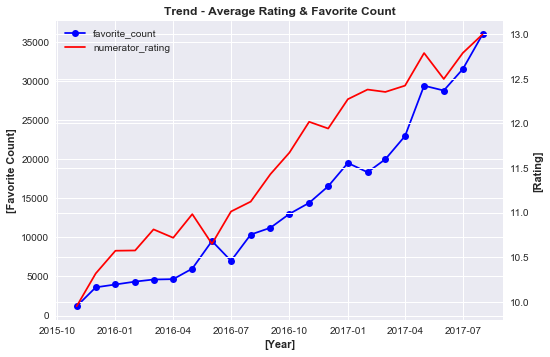

In [394]:
# Plot the trend of Average Rating & Favorite Count over the time period 
fig, ax1 = plt.subplots()
plt.title('Trend - Average Rating & Favorite Count', fontweight='bold')
fav = dfnum_fav['favorite_count']
rating = dfnum_fav['numerator_rating']
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel('[Year]' , fontweight='bold')

ax1.plot(dfnum_fav.index,fav, marker='o', color='blue', linestyle='solid')
ax1.set_ylabel("[Favorite Count]", fontweight='bold')

ax2 = ax1.twinx()
ax2.plot(dfnum_fav.index,rating, marker='x', color='red', linestyle='solid')
ax2.set_ylabel("[Rating]", fontweight='bold')



# Code for Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

plt.show()

#### Insight 2
- The top 5 rated dog breeds are (starting highest) - Pembroke ,Samoyed, chow, Golden Retriever, Cardigan
- The bottom 5 rated dog breeds are (starting lowest)- Maltese dog, Pug ,Shetland sheepdog, German Shepherd, Chihuahua

In [395]:
# Average numerator rating and favorite count for a dog breed
dftwit_Ana.groupby('dog_breed')['favorite_count', 'numerator_rating'].mean().sort_values(by = 'favorite_count',ascending = False)

,favorite_count,numerator_rating
dog_breed,,
black-and-tan_coonhound,"33,170.00",14.00
Saluki,"23,594.75",12.50
Afghan_hound,"21,891.00",13.00
Bedlington_terrier,"21,619.20",11.20
French_bulldog,"19,640.61",11.19
flat-coated_retriever,"18,568.00",11.71
Bouvier_des_Flandres,"17,577.00",13.00
Irish_water_spaniel,"16,001.00",11.33
English_springer,"15,326.22",11.11


In [396]:
dftwit_Ana.groupby('dog_breed').agg({'favorite_count': 'mean',
                                     'numerator_rating': 'mean' , 'tweet_id': 'count'}).sort_values(by = 'tweet_id',ascending = False)

,favorite_count,numerator_rating,tweet_id
dog_breed,,,
None,"8,724.43",10.78,216
golden_retriever,"11,989.54",11.60,156
Labrador_retriever,"11,625.17",11.23,107
Pembroke,"11,185.29",11.67,91
Chihuahua,"9,019.24",11.00,83
pug,"6,408.34",10.55,58
toy_poodle,"6,605.30",11.12,50
chow,"9,502.09",11.61,46
Samoyed,"13,780.39",11.80,41


In [397]:
len(dftwit_Ana['dog_breed'].value_counts())

113

In [398]:
# Consider only those dogs for which confidence level in prediction of breed is >=0.5

dfdog_breed = dftwit_Ana[(dftwit_Ana.confidence_level >=0.5) & (dftwit_Ana.dog_breed != 'None')]
dfdog_breed = dfdog_breed.groupby('dog_breed' , as_index=False).agg({'favorite_count': 'mean',
                                'numerator_rating': 'mean' , 'tweet_id': 'count'}).sort_values(by = 'tweet_id',ascending = False)

# Considering breeds that have more than 11 entries ( it forms more than 2.5% of valid dog breeds population) - say Top 10 breeds
dfdog_breed_num = dfdog_breed[dfdog_breed['tweet_id'] > 11].sort_values(by = 'numerator_rating',ascending = False) 


In [399]:
dfdog_breed_num.head(5)

,dog_breed,favorite_count,numerator_rating,tweet_id
42,Pembroke,"13,212.84",11.85,68
48,Samoyed,"13,147.50",11.73,30
69,chow,"11,558.65",11.73,26
77,golden_retriever,"12,131.38",11.67,114
10,Cardigan,"15,748.17",11.67,12


In [400]:
dfdog_breed_num.tail(5)

,dog_breed,favorite_count,numerator_rating,tweet_id
12,Chihuahua,"10,219.02",11.07,42
20,German_shepherd,"10,096.37",11.05,19
49,Shetland_sheepdog,"8,597.67",10.75,12
88,pug,"5,268.10",10.46,41
35,Maltese_dog,"2,970.43",10.14,14


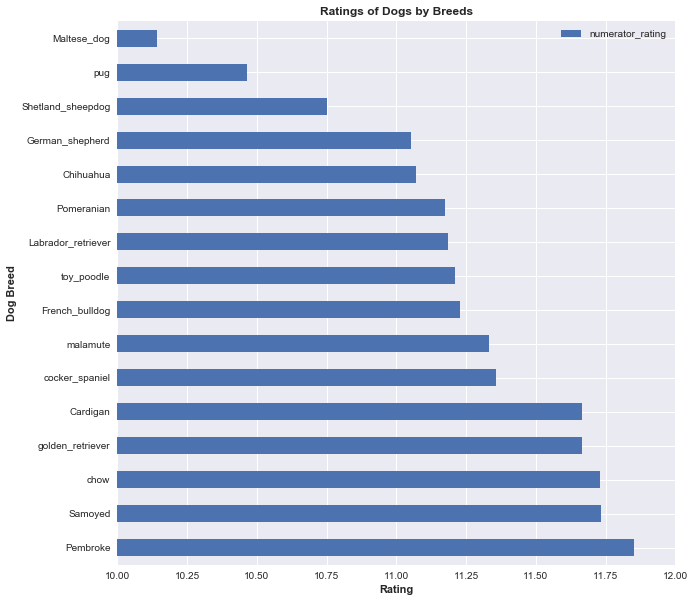

In [401]:
# Plot a Bar Chart to display
dfdog_breed_num.plot.barh('dog_breed', 'numerator_rating',figsize=(10,10), xlim = (10,12))
plt.ylabel('Dog Breed', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')
plt.title('Ratings of Dogs by Breeds' , fontweight='bold')
plt.show()

#### Insight 3 
- The top 5 most liked dog breeds are (starting highest) - French Bulldog , Cardigan, Labrador Retriever, Pembroke, Samoyed
- The bottom 5 liked dog breeds are (starting lowest)- Maltese dog, Pug ,Toy Poodle,Pomeranian, Shetland Sheepdog
- Pembroke,Samoyed and Cardigan are common in the top 5 ratings and favorites
- Maltese dog, Pug, Shetland Sheepdog are common in the bottom 5 ratings and favorites

In [402]:
# Exploring the favorite count (liked) by dog breed

In [403]:
# Considering breeds that have more than 11 entries ( 2.5% of valid dog breeds) - - say Top 10 breeds
dfdog_breed_fav = dfdog_breed[dfdog_breed['tweet_id'] > 11].sort_values(by = 'favorite_count' , ascending = False) 

In [404]:
dfdog_breed_fav.head(5)

,dog_breed,favorite_count,numerator_rating,tweet_id
19,French_bulldog,"18,595.64",11.23,22
10,Cardigan,"15,748.17",11.67,12
31,Labrador_retriever,"13,625.23",11.18,65
42,Pembroke,"13,212.84",11.85,68
48,Samoyed,"13,147.50",11.73,30


In [405]:
dfdog_breed_fav.tail(5)

,dog_breed,favorite_count,numerator_rating,tweet_id
49,Shetland_sheepdog,"8,597.67",10.75,12
43,Pomeranian,"7,746.41",11.17,29
93,toy_poodle,"7,476.42",11.21,24
88,pug,"5,268.10",10.46,41
35,Maltese_dog,"2,970.43",10.14,14


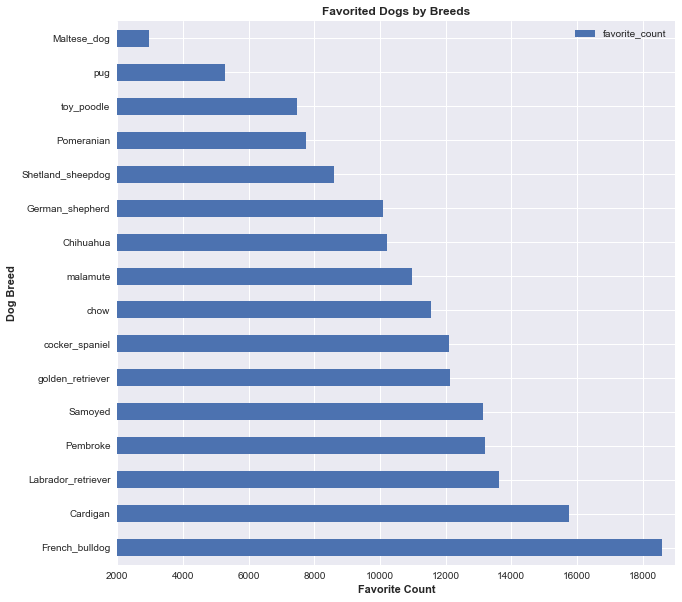

In [406]:
# Plot
dfdog_breed_fav.plot.barh('dog_breed', 'favorite_count',figsize=(10,10), xlim = (2000,19000))
plt.ylabel('Dog Breed', fontweight='bold')
plt.xlabel('Favorite Count', fontweight='bold')
plt.title('Favorited Dogs by Breeds' , fontweight='bold')
plt.show()

### VISUALIZATION

###### Correlation Heatmap
- This figure shows the corrrelation betwen different features of the Project data set
- We can see a strong correlation between retweet count and favorite count
- There doesn't seem to be a strong corelation between the numerator rating and favorite count and retweet count

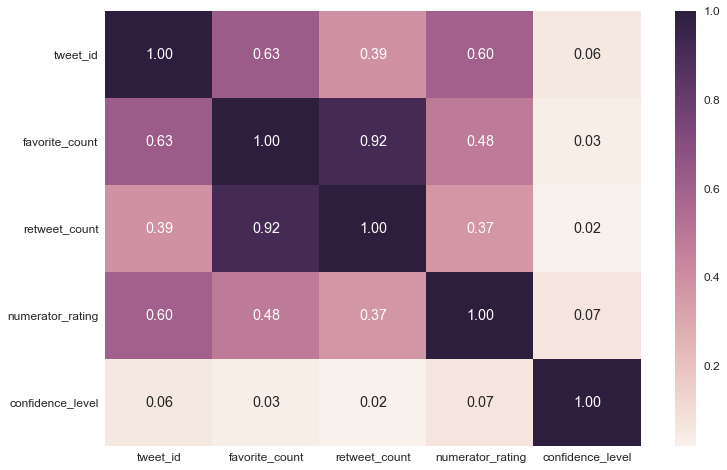

In [407]:
# Plot a correlation heatmap
dftwit_Ana_corr= dftwit_Ana.corr(method='pearson', min_periods=1)
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 8))
sns.heatmap(dftwit_Ana_corr, annot=True, fmt=".2f");

In [408]:
# This plot further supports how well they track each other

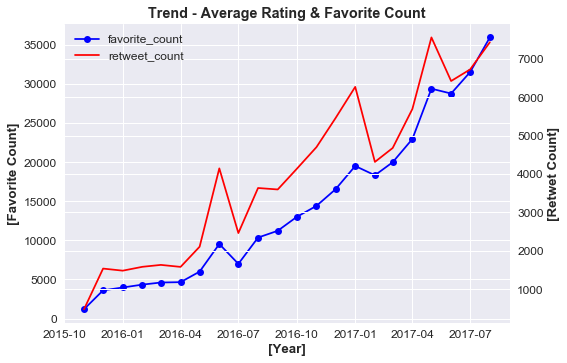

In [409]:
# Plot the trend of Retweet Count & Favorite Count over the time period 
fig, ax1 = plt.subplots()
plt.title('Trend - Average Rating & Favorite Count', fontweight='bold')
fav = dfnum_fav['favorite_count']
retwt = dfnum_fav['retweet_count']

plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel('[Year]' , fontweight='bold')

ax1.plot(dfnum_fav.index,fav, marker='o', color='blue', linestyle='solid')
ax1.set_ylabel("[Favorite Count]", fontweight='bold')

ax2 = ax1.twinx()
ax2.plot(dfnum_fav.index,retwt, marker='x', color='red', linestyle='solid')
ax2.set_ylabel("[Retwet Count]", fontweight='bold')



# Code for Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

plt.show()